In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from LLS import LLS

In [385]:
n_samples = 100
study_hours = np.random.normal(2,1,n_samples)
study_hours = np.clip(study_hours, 0, None)
  
noise = np.random.normal(0, 3, n_samples)
grades =  study_hours * 5 + noise
grades = np.clip(grades, 0, 20)

In [386]:
# data = pd.DataFrame({
#     'study_hours': study_hours,
#     'grades': grades
# })
# data.head()

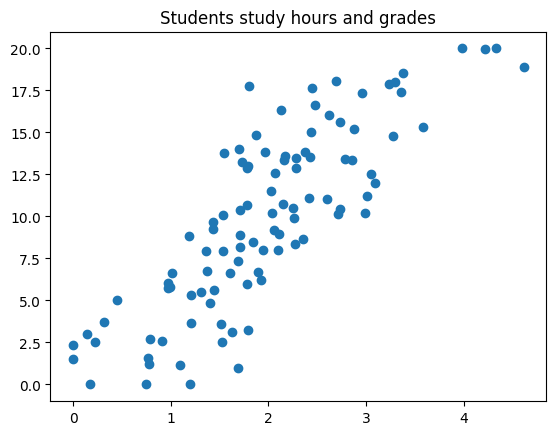

In [387]:
plt.title("Students study hours and grades")
plt.scatter(study_hours,grades)
plt.show()

In [388]:
X_train, X_test, Y_train, Y_test = train_test_split(study_hours,grades,test_size=.2)
X_train = X_train.reshape(-1, 1)

In [392]:
lls = LLS()
w = lls.solve(X_train,Y_train)
w_stats, intercept, r, p, std_err = stats.linregress(X_train.T, Y_train)


c:\Users\PC-Kosar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
c:\Users\PC-Kosar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


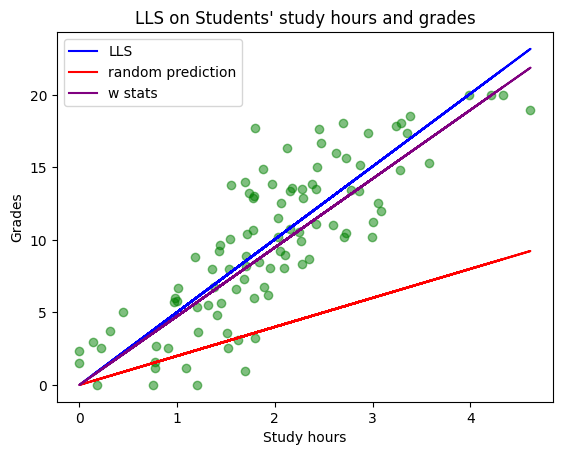

In [394]:
plt.title("LLS on Students' study hours and grades")
plt.xlabel('Study hours')
plt.ylabel('Grades')
plt.scatter(study_hours,grades,color='g',alpha=.5)
plt.plot(X_train, w * X_train, color='b',label='LLS')
plt.plot(X_train, 2 * X_train, color='r',label='random prediction')
plt.plot(X_train, w_stats * X_train, color='purple',label='w stats')
plt.legend()
plt.show()
